<a href="https://colab.research.google.com/github/sathwick77/2105A42010/blob/main/Copy_of_MultipleLinearRegression_AI_Track_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Libraries

In [38]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load Data

In [14]:
odi_df = pd.read_csv("/Virat_Kohli_ODI.csv")
odi_df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [19]:
# Checking for null values
odi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


In [20]:
# Checking missing values for 'Mins'
odi_df[odi_df['Mins']=="-"]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
10,107,-,114,11,1,93.85,4,caught,2,v Sri Lanka,Kolkata,24-Dec-09
13,31,-,46,1,0,67.39,5,caught,1,v South Africa,Jaipur,21-Feb-10
14,57,-,71,4,1,80.28,3,caught,2,v South Africa,Ahmedabad,27-Feb-10
51,86*,-,99,11,0,86.86,4,not out,2,v England,Mumbai,23-Oct-11
105,49,-,44,2,2,111.36,4,caught,2,v Sri Lanka,Ahmedabad,6-Nov-14
106,53,-,61,4,1,86.88,4,caught,2,v Sri Lanka,Hyderabad (Deccan),9-Nov-14


In [21]:
# Calculating average minutes per ball to use it for filling missing values in 'Mins' column
temp_df = odi_df[odi_df['Mins']!="-"]
temp_df['Mins'] = temp_df['Mins'].astype(int)
temp_arr = temp_df.agg({'Mins':'sum', 'BF':'sum'}).values
avg_min_per_ball = temp_arr[1]/temp_arr[0]


<ipython-input-21-f664ebe704ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Mins'] = temp_df['Mins'].astype(int)


In [39]:
# Impute missing values in 'Mins' columns by 'BF'*avg_min_per_ball
odi_df['Mins'] = odi_df[['Mins','BF']].apply(lambda x: int(x[1]*avg_min_per_ball) if x[0]=='-' else int(x[0]), axis=1)

In [25]:
# Create a new boolean column 'Not Out'
odi_df['Not Out'] = odi_df['Runs'].apply(lambda x: 'Yes' if '*' in x else 'No')

In [26]:
# Convert datatype of 'Runs' column to integer
odi_df['Runs'] = odi_df['Runs'].apply(lambda x: int(x[:-1]) if '*' in x else int(x))

In [27]:
# Convert datatype of 'Start Date' to datetime
odi_df['Start Date'] = pd.to_datetime(odi_df['Start Date'])
# Create a new column 'Quarter' from 'Start Date'
odi_df['Quarter'] = odi_df['Start Date'].dt.quarter
# Create a new column 'Year' from 'Start Date'
odi_df['Year'] = odi_df['Start Date'].dt.year

In [28]:
# Checking for missing values in Strike Rate
odi_df[odi_df['SR']=="-"]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
15,0,3,0,0,0,-,3,run out,1,v Zimbabwe,Bulawayo,2010-05-28,No,2,2010


In [37]:
# Imputing Strike Rate with 0 since for that match Virat got out at 0 and converting it to float type
odi_df[odi_df['SR']=="-"] = 0
odi_df['SR'] = odi_df['SR'].astype(float) 
odi_df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18 00:00:00,No,3,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20 00:00:00,No,3,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24 00:00:00,No,3,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27 00:00:00,No,3,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29 00:00:00,No,3,2008
5,2,6,2,0,0,100.00,7,not out,1,v Sri Lanka,Colombo (RPS),2009-09-14 00:00:00,Yes,3,2009
6,30,53,41,3,0,73.17,4,caught,2,v Australia,Vadodara,2009-10-25 00:00:00,No,4,2009
7,10,32,16,1,0,62.50,3,caught,2,v Australia,Mohali,2009-11-02 00:00:00,No,4,2009
8,27,20,19,4,0,142.10,7,bowled,1,v Sri Lanka,Rajkot,2009-12-15 00:00:00,No,4,2009
9,54,93,65,7,0,83.07,4,lbw,1,v Sri Lanka,Nagpur,2009-12-18 00:00:00,No,4,2009


In [36]:
# Removing row with all Null values
odi_df[odi_df['Year']==0]
odi_df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18 00:00:00,No,3,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20 00:00:00,No,3,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24 00:00:00,No,3,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27 00:00:00,No,3,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29 00:00:00,No,3,2008
5,2,6,2,0,0,100.00,7,not out,1,v Sri Lanka,Colombo (RPS),2009-09-14 00:00:00,Yes,3,2009
6,30,53,41,3,0,73.17,4,caught,2,v Australia,Vadodara,2009-10-25 00:00:00,No,4,2009
7,10,32,16,1,0,62.50,3,caught,2,v Australia,Mohali,2009-11-02 00:00:00,No,4,2009
8,27,20,19,4,0,142.10,7,bowled,1,v Sri Lanka,Rajkot,2009-12-15 00:00:00,No,4,2009
9,54,93,65,7,0,83.07,4,lbw,1,v Sri Lanka,Nagpur,2009-12-18 00:00:00,No,4,2009


In [35]:
odi_df = odi_df[odi_df['Year']!=0]
odi_df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18 00:00:00,No,3,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20 00:00:00,No,3,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24 00:00:00,No,3,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27 00:00:00,No,3,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29 00:00:00,No,3,2008
5,2,6,2,0,0,100.00,7,not out,1,v Sri Lanka,Colombo (RPS),2009-09-14 00:00:00,Yes,3,2009
6,30,53,41,3,0,73.17,4,caught,2,v Australia,Vadodara,2009-10-25 00:00:00,No,4,2009
7,10,32,16,1,0,62.50,3,caught,2,v Australia,Mohali,2009-11-02 00:00:00,No,4,2009
8,27,20,19,4,0,142.10,7,bowled,1,v Sri Lanka,Rajkot,2009-12-15 00:00:00,No,4,2009
9,54,93,65,7,0,83.07,4,lbw,1,v Sri Lanka,Nagpur,2009-12-18 00:00:00,No,4,2009


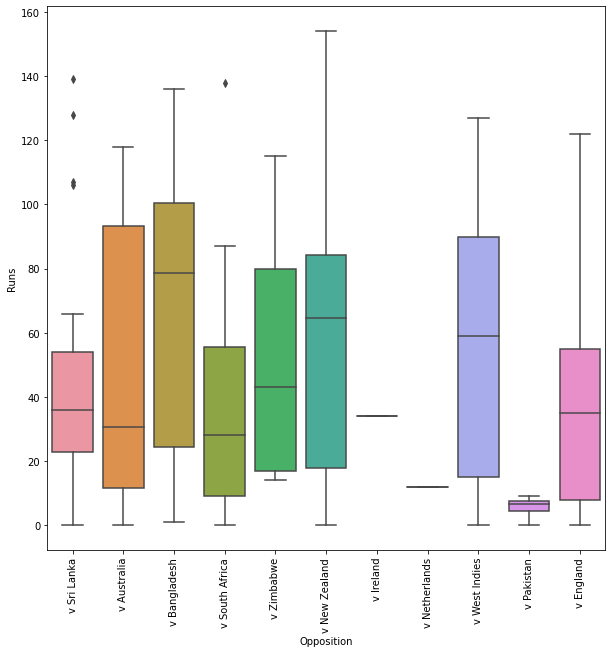

In [34]:
plt.figure(figsize = (10,10))
sns.boxplot(x= 'Opposition', y = 'Runs', data = odi_df)
plt.xticks(rotation = 90)
plt.show()

## Thank you